# PyMLearn Tutorial
### Installation command: pip install pymlearn

## Load and preprocess the (Iris) dataset

In [1]:
from sklearn.datasets import load_iris
from pymlearn.tools import shuffle_split

iris = load_iris()

(x_train, y_train), (x_test, y_test) = shuffle_split(
    iris.data, # x
    iris.target, # y
    test_size=0.33, # portion of data to use for validation
    one_hot_y=True, # optional one-hot encoding for y
    scale_x=True, # optional scaling for x
    seed=42 # optional random seed for shuffling the data
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape # data should be 2D

((100, 4), (100, 3), (50, 4), (50, 3))

## Additional preprocessing tools are available

In [2]:
from pymlearn.tools import one_hot, scale

y = one_hot(iris.target) # one-hot encoding for categorical data

x_train, x_test = scale(x_train, x_test) # fits to first argument and transforms first and (optional) second

## Initialize a model

In [3]:
from pymlearn import ANN

model = ANN(
    nodes=[x_train.shape[1], 10, y_train.shape[1]], # nodes per layer (input, hidden layers, output)
    activations=['relu', 'sigmoid'], # 'linear', 'relu', or 'sigmoid' activations for hidden and output layers
    loss='bce' # 'mse' (mean squared error) or 'bce' (binary cross-entropy) loss function
)

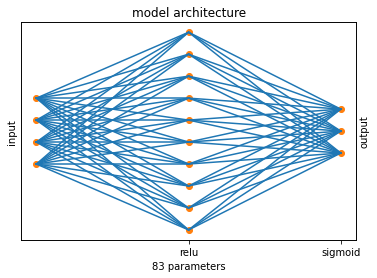

In [4]:
model.visualize(save=False) # optional saving of a PNG

## View model layer parameters

In [5]:
model.layers[0] # each layer consists of a dictionary of 'w' (weights), 'b' (biases), and 'a' (activation)

{'w': array([[-0.50141554, -0.17923415,  0.51110228, -0.54240367, -0.84604018,
         -0.42049709, -0.67755743,  0.8593953 ,  0.61624076,  0.26680751],
        [ 0.74292118,  0.60734415, -0.62685988,  0.785118  ,  0.07868448,
          0.61488031,  0.7921826 , -0.36399305, -0.77989615, -0.54412967],
        [-0.14578442,  0.63602953,  0.72146117, -0.98609574,  0.02149461,
         -0.16517799, -0.55578438, -0.76026927, -0.32476966,  0.88581941],
        [-0.35359414,  0.03758124,  0.40603792, -0.2727408 ,  0.94356417,
          0.92489459, -0.49643541, -0.00550299, -0.39824338, -0.43031901]]),
 'b': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'a': 'relu'}

## Fit the model to the data

In [6]:
model.fit(
    x_train, y_train, x_test, y_test, # input data
    epochs=300, # training iterations
    optimizer='sgd', # 'sgd', 'momentum', 'adadelta', 'adam', or 'radam'
    alpha=0.1, # for 'sgd', 'momentum', 'adam', and 'radam'
    beta=0.9, # for 'momentum', 'adam', and 'radam'
    beta2=0.999, # for 'adam' and 'radam'
    gamma=0.9, # for 'adadelta'
    verbose=[] # options are 'loss' and/or 'accuracy'
)

## Plot the model history

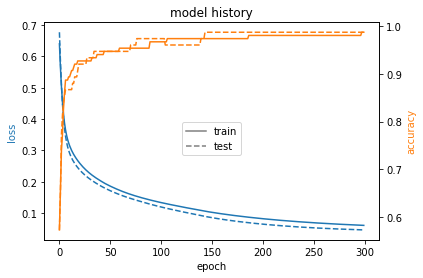

In [7]:
model.plot(
    metric=None, # optional single-metric plotting for 'loss' or 'accuracy'
    save=False # optional saving of a PNG
)

## Access the model history (dictionary)

In [8]:
model.history['test accuracy'][-1] # contains 'train loss', 'test loss', 'train accuracy', and 'test accuracy'

0.9866666666666667

## Predict on test data

In [9]:
model.predict(x_test, categorical=True)[0] # optional categorical boolean

array([0., 1., 0.])

## Independent model history and visualization tools are available

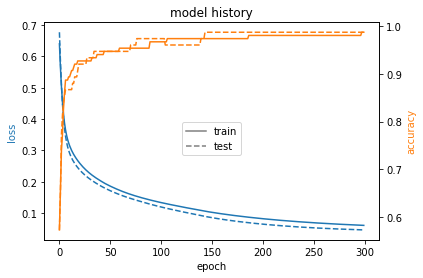

In [10]:
from pymlearn.tools import plot_history

plot_history(
    model.history, # history dictionary (such as that from a Keras model)
    metric=None, # optional single-metric plotting for 'loss' or 'accuracy'
    save=False # optional saving of a PNG
)

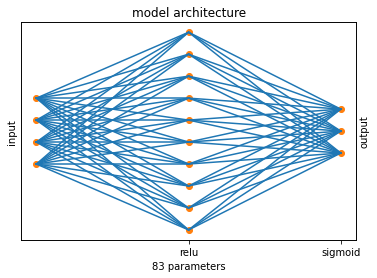

In [11]:
from pymlearn.tools import visualize_network

visualize_network(
    nodes=[4, 10, 3], # nodes per layer (input, hidden layers, output)
    activations=['relu', 'sigmoid'], # optional activations for hidden and output layers
    save=False # optional saving of a PNG
)